#Import Packages

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn import
from sklearn.metrics import accuracy_score

#Upload Data

In [131]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult (3).csv


In [132]:
data=pd.read_csv('adult.csv')

In [133]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#Attribute Information:

1.age: continuous.

2.workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3.fnlwgt: continuous.

4.education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5.education-num: continuous.

6.marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7.occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8.relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9.race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10.sex: Female, Male.

11.capital-gain: continuous.

12.capital-loss: continuous.

13.hours-per-week: continuous.

14.native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

15.class: >50K, <=50K
#Notes for Delve
One prototask (income) has been defined, using attributes 1-13 as inputs and income level as a binary target.
Missing values - These are confined to attributes 2 (workclass), 7 (occupation) and 14 (native-country). The prototask only uses cases with no missing values.
The income prototask comes with two priors, differing according to if attribute 4 (education) is considered to be nominal or ordinal.

In [134]:
data.shape

(48842, 15)

In [135]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


 Check how many times the value '?' appears in each column of the DataFrame.
 This is often used to detect missing values that are represented as '?' instead of NaN.

In [136]:
data.isin(['?']).sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


Replacing ? with Nan

In [137]:
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)

In [138]:
data.isna().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [139]:
# Check For Missing Values,Duplication,Uniqueness
info = pd.DataFrame(data.isnull().sum(),columns=["IsNull"])
info.insert(1,"Duplicate",data.duplicated().sum(),True)
info.insert(2,"Unique",data.nunique(),True)
info.T

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
Duplicate,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2


results:

1.no null or Nan Value.but the dataset is not using the default nan string for missing values, instead "?" is used. after convert '?' to Nan three columns ['workclass','occupation','native-country] have nan

2.there are 52 duplicated row.

In [162]:
df=data.copy()

Remove Duplication

In [163]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Remove Null Values

In [164]:
df.dropna(how='any',inplace=True)

In [165]:
df.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [166]:
def find_constant_dominance_columns(df, value=0.0, threshold=0.75):
    """
    Identify columns where a specific value dominates (e.g., 0.0 in more than 75% of rows).

    Parameters:
        df (pd.DataFrame): The dataset to analyze.
        value (any): The value to check frequency of (default is 0.0).
        threshold (float): Threshold ratio (e.g., 0.75 means 75%).

    Returns:
        list: Columns where the given value appears >= threshold ratio.
    """
    dominant_columns = []
    for col in df.columns:
        ratio = (df[col] == value).mean()
        if ratio >= threshold:
            dominant_columns.append(col)
    return dominant_columns


In [167]:
columns_to_drop = find_constant_dominance_columns(data, value=0.0, threshold=0.75)
print("Suggested columns to drop:", columns_to_drop)

Suggested columns to drop: ['capital-gain', 'capital-loss']


[ 'capital-gain' ] & [ 'capital-loss' ] both columns have 75% data as 0.00 So, we can drop [ 'capital-gain' ] & [ 'capital-loss' ] both columns   func to discover this

Check Columns education &	educational-num

In [168]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [169]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1])

As we can see, 'education' & 'educational-num' both columns have similer values.
'education' has string values
'educational-num' has numerical values
all HS-grad from education represents 9 in education-num
all Masters from education represents 14 in education-num and likewise.
Both columns conveying same information
So, we can remove 'education' colum

In [170]:
df_1=df.drop(['education','capital-gain', 'capital-loss'],axis=1)

In [171]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   educational-num  45222 non-null  int64 
 4   marital-status   45222 non-null  object
 5   occupation       45222 non-null  object
 6   relationship     45222 non-null  object
 7   race             45222 non-null  object
 8   gender           45222 non-null  object
 9   hours-per-week   45222 non-null  int64 
 10  native-country   45222 non-null  object
 11  income           45222 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [172]:
df_1.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [173]:
info = pd.DataFrame(data.nunique(),columns=["Unique"])
info.T

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
Unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2


In [174]:
df_1.columns

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [175]:
from sklearn.preprocessing import LabelEncoder


categorical_cols = [ 'workclass', 'fnlwgt',  'marital-status',
       'occupation', 'relationship', 'race', 'gender',
       'native-country', 'income']

for col in categorical_cols:
    le = LabelEncoder()
    df_1[col] = le.fit_transform(df_1[col])

In [176]:
df_1.head(10)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,2,18119,7,4,6,3,2,1,40,38,0
1,38,2,3913,9,2,4,0,4,1,50,38,0
2,28,1,23770,12,2,10,0,4,1,40,38,1
3,44,2,10474,10,2,6,0,2,1,40,38,1
5,34,2,15397,6,4,7,1,4,1,30,38,0
7,63,4,5158,15,2,9,0,4,1,32,38,1
8,24,2,24773,10,4,7,4,4,0,40,38,0
9,55,2,5195,4,2,2,0,4,1,10,38,0
10,65,2,13488,9,2,6,0,4,1,40,38,1
11,36,0,16896,13,2,0,0,4,1,40,38,0


In [177]:
df_1.shape

(45222, 12)

In [179]:
# Check For Missing Values
info = pd.DataFrame(df_1.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df_1.isna().sum(),True)
info.T


,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0


In [180]:
corr=df_1.corr()
corr

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
age,1.000000,0.085892,-0.077813,0.037623,-0.271623,-0.004474,-0.247564,0.023776,0.082053,0.101992,-0.003180,0.237040
workclass,0.085892,1.000000,-0.039074,0.040779,-0.033221,0.017508,-0.065049,0.049765,0.069638,0.051366,0.003889,0.015659
fnlwgt,-0.077813,-0.039074,1.000000,-0.041017,0.034084,-0.000534,0.007622,-0.014664,0.028050,-0.018779,-0.066841,-0.006492
educational-num,0.037623,0.040779,-0.041017,1.000000,-0.064986,0.089686,-0.088431,0.031655,0.003417,0.146206,0.092994,0.332800
marital-status,-0.271623,-0.033221,0.034084,-0.064986,1.000000,0.016399,0.180436,-0.070302,-0.120008,-0.183178,-0.022721,-0.192711
occupation,-0.004474,0.017508,-0.000534,0.089686,0.016399,1.000000,-0.051644,-0.000026,0.056625,0.016160,-0.002848,0.049787
relationship,-0.247564,-0.065049,0.007622,-0.088431,0.180436,-0.051644,1.000000,-0.118584,-0.582974,-0.259194,-0.007144,-0.253402
race,0.023776,0.049765,-0.014664,0.031655,-0.070302,-0.000026,-0.118584,1.000000,0.088935,0.044738,0.124342,0.070844
gender,0.082053,0.069638,0.028050,0.003417,-0.120008,0.056625,-0.582974,0.088935,1.000000,0.231425,-0.004170,0.215760
hours-per-week,0.101992,0.051366,-0.018779,0.146206,-0.183178,0.016160,-0.259194,0.044738,0.231425,1.000000,0.007554,0.227199


<function matplotlib.pyplot.show(close=None, block=None)>

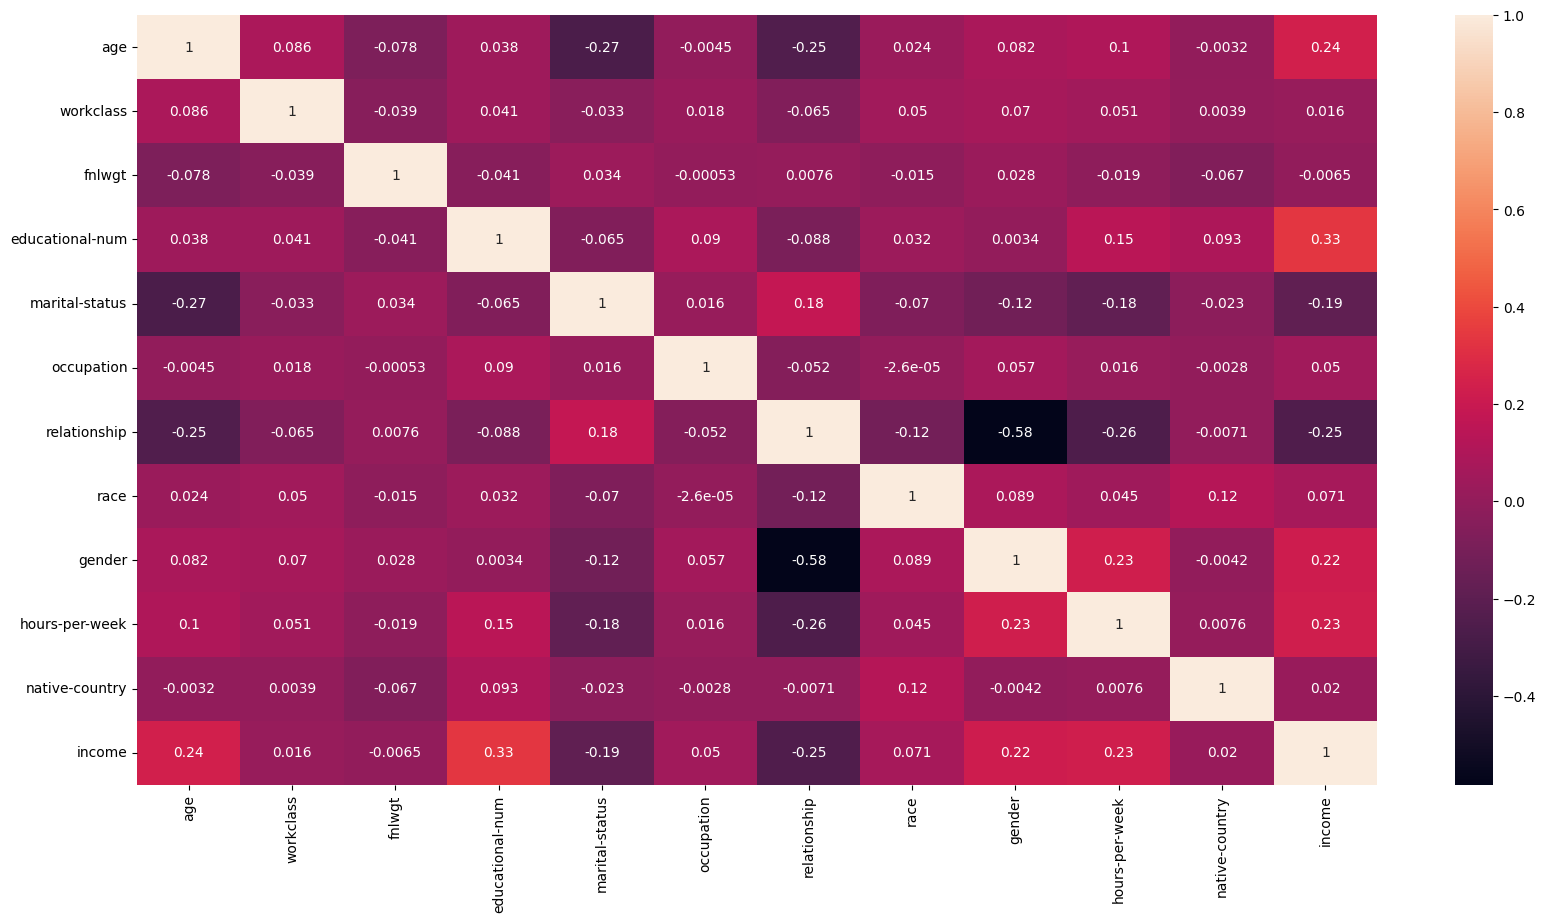

In [183]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show

In [184]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 7))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')


    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')

    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)
    plt.title('Barplot')


    plt.show()

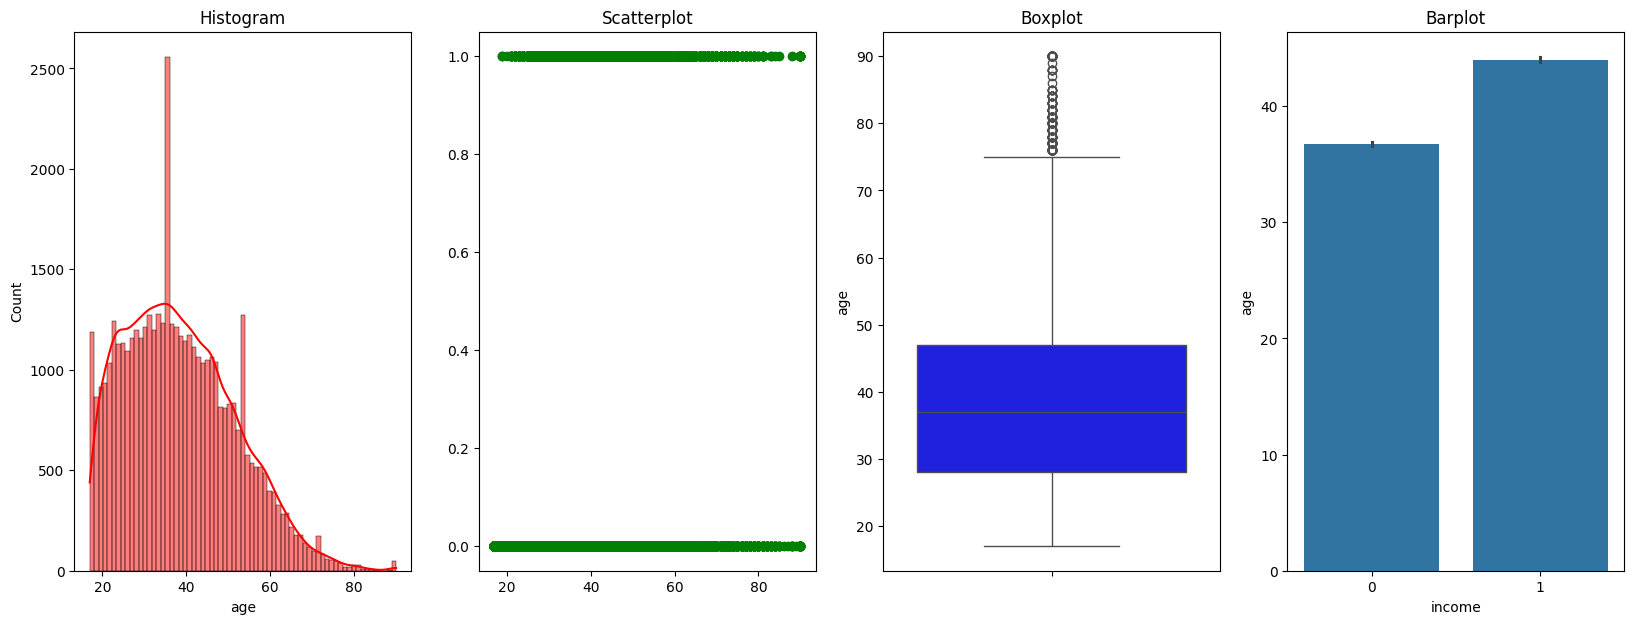

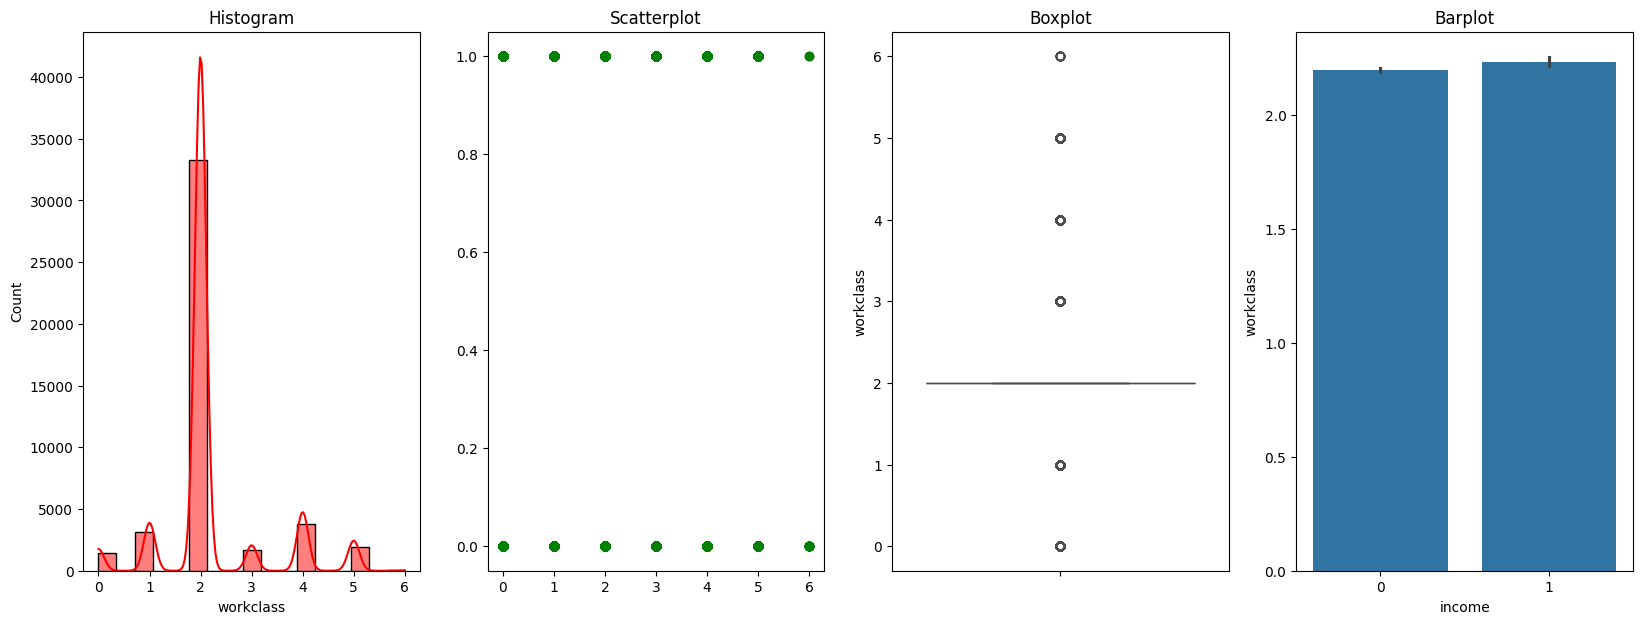

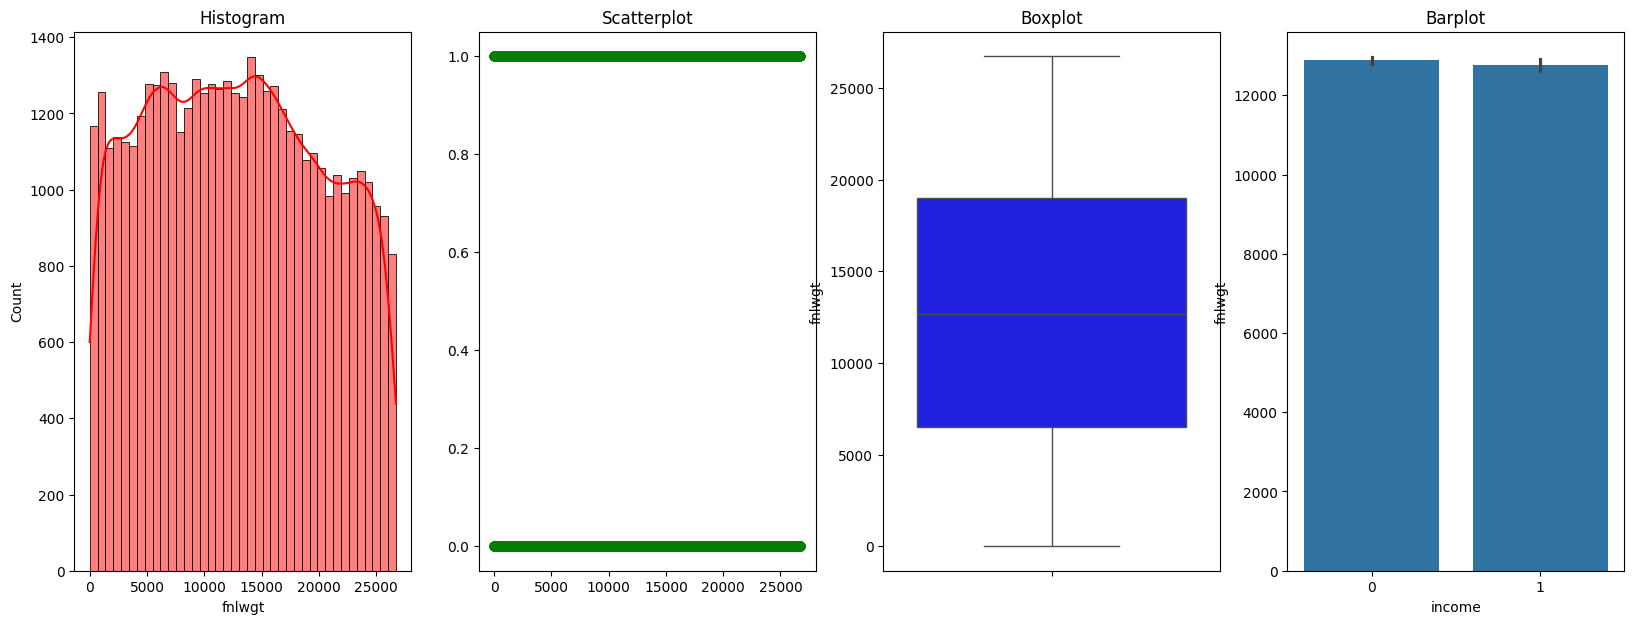

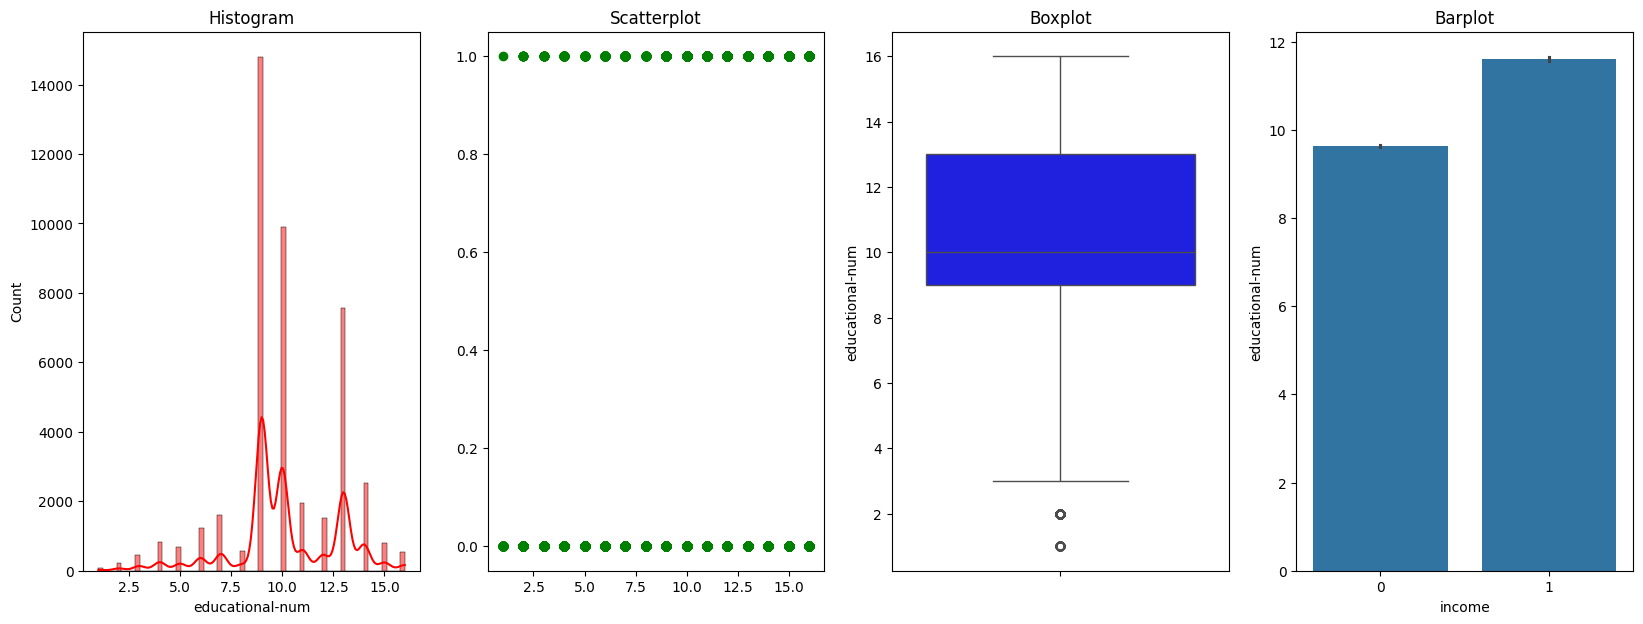

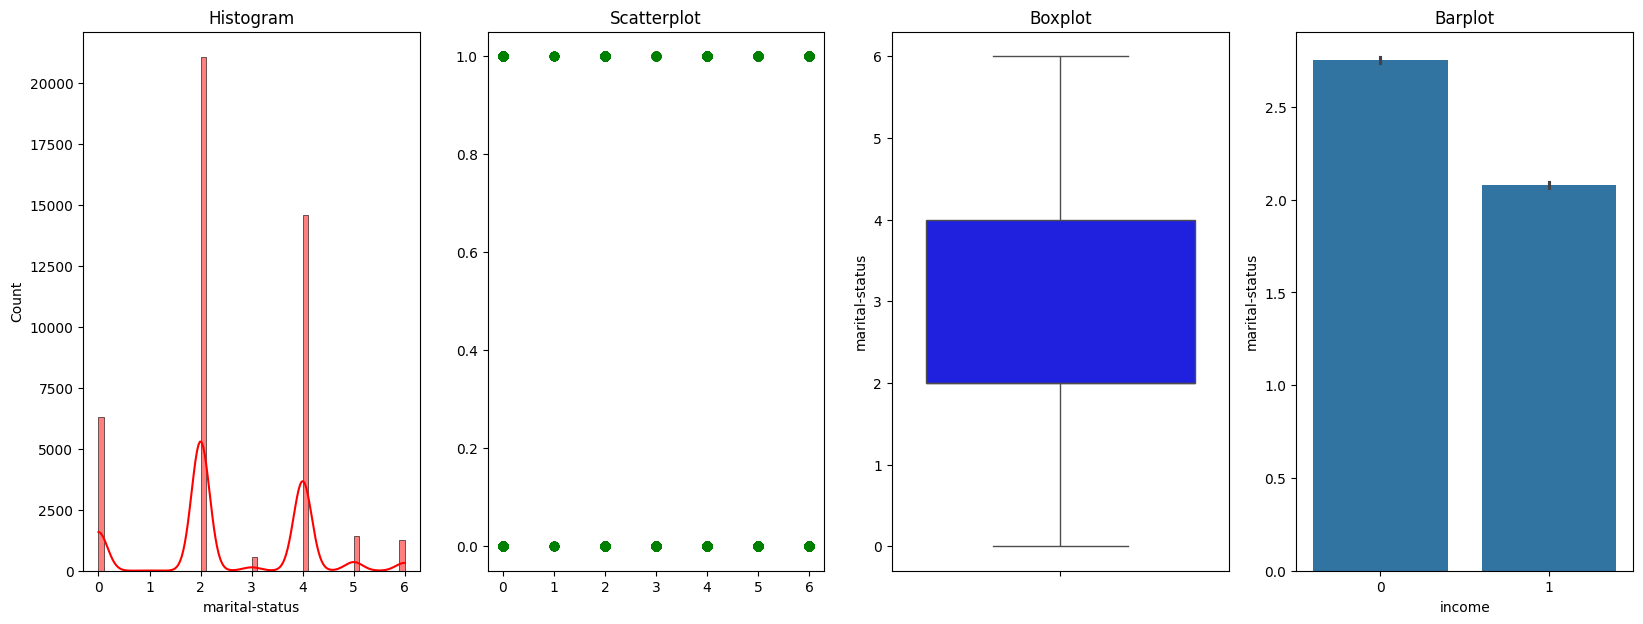

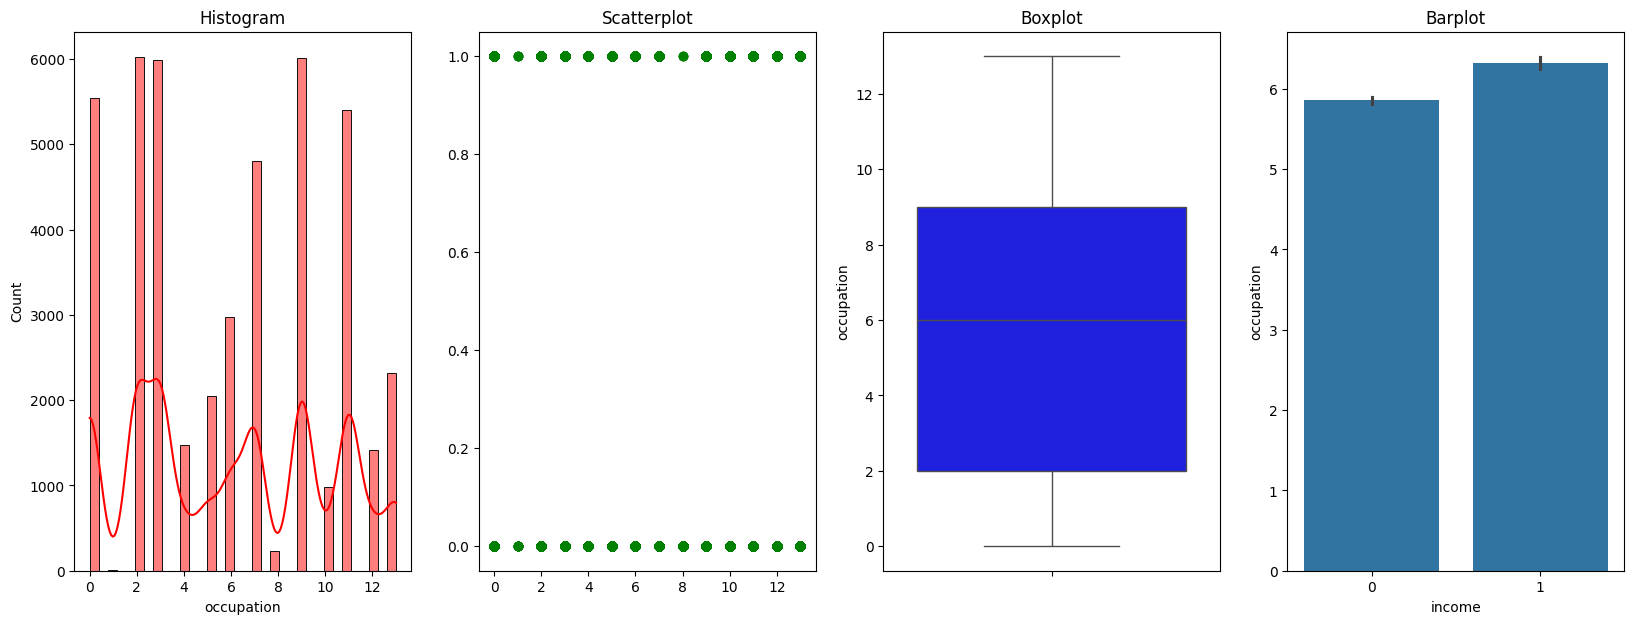

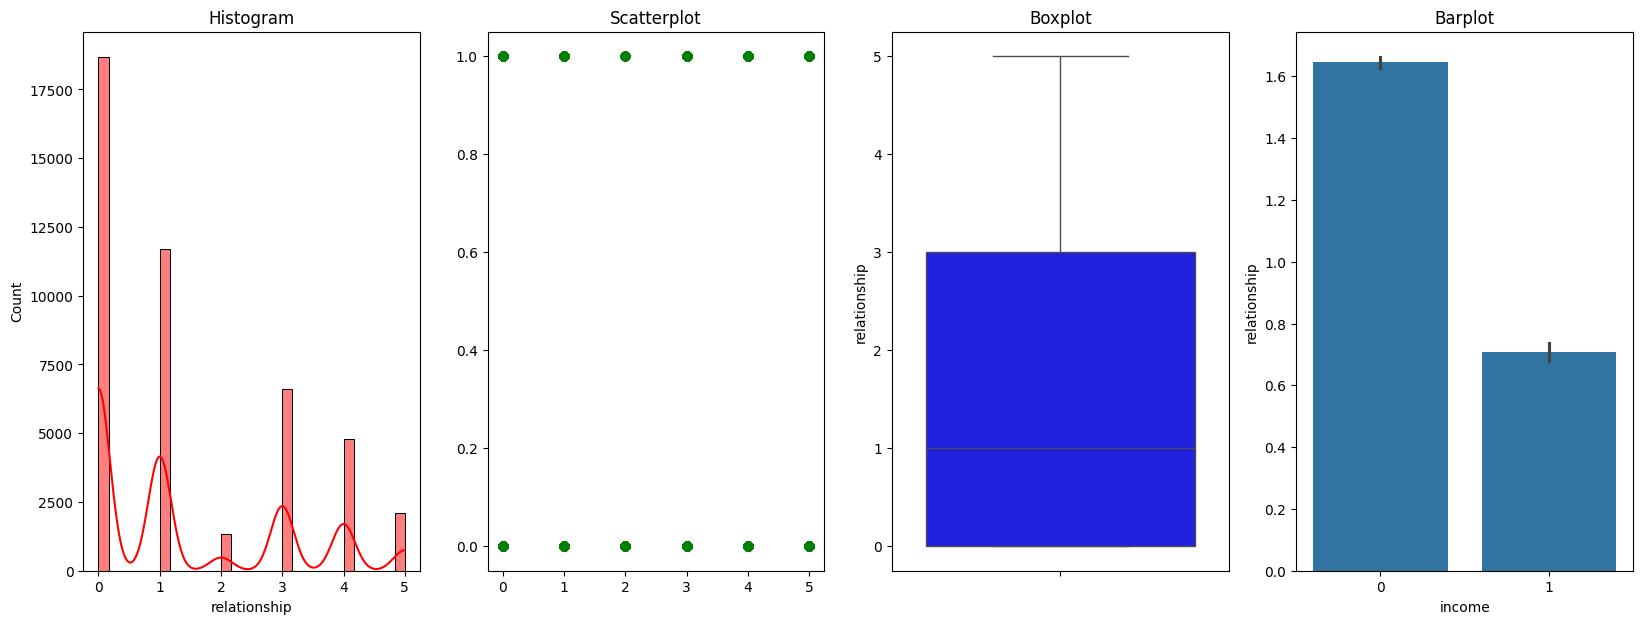

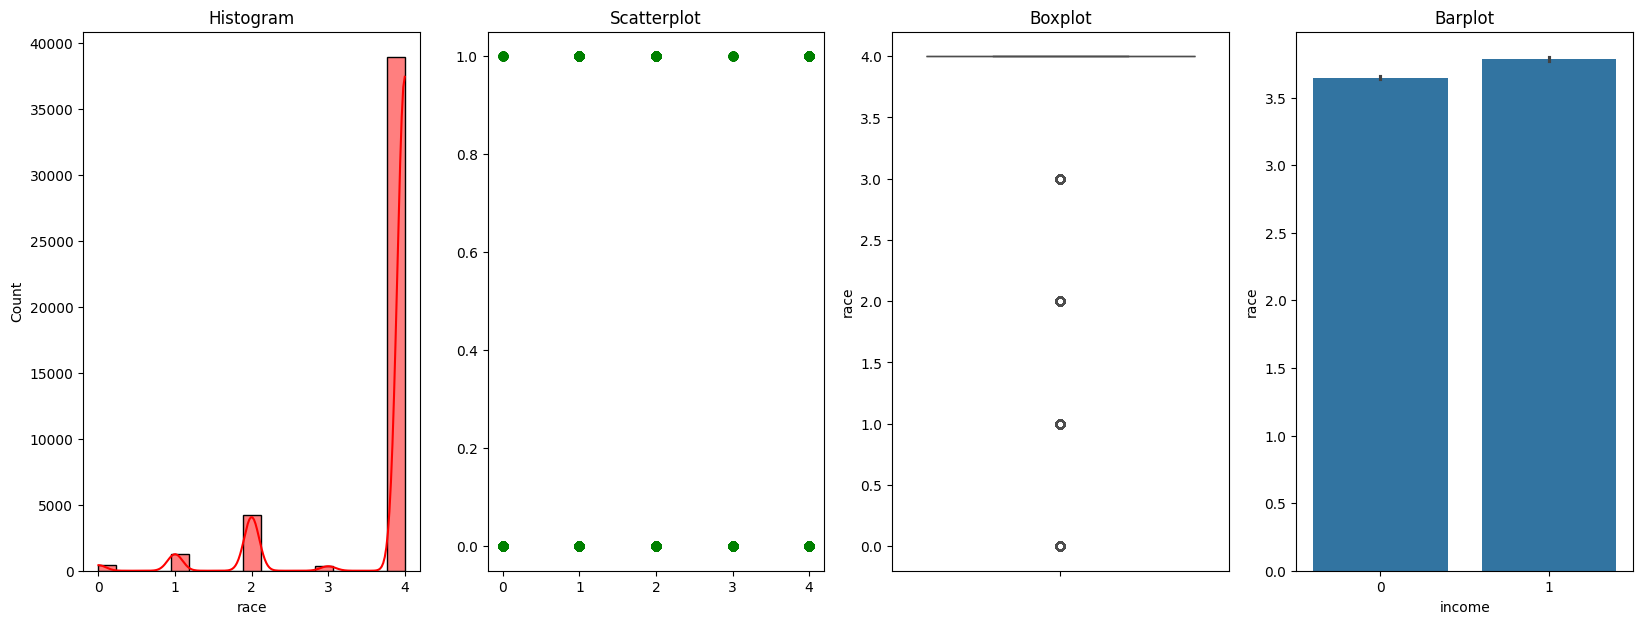

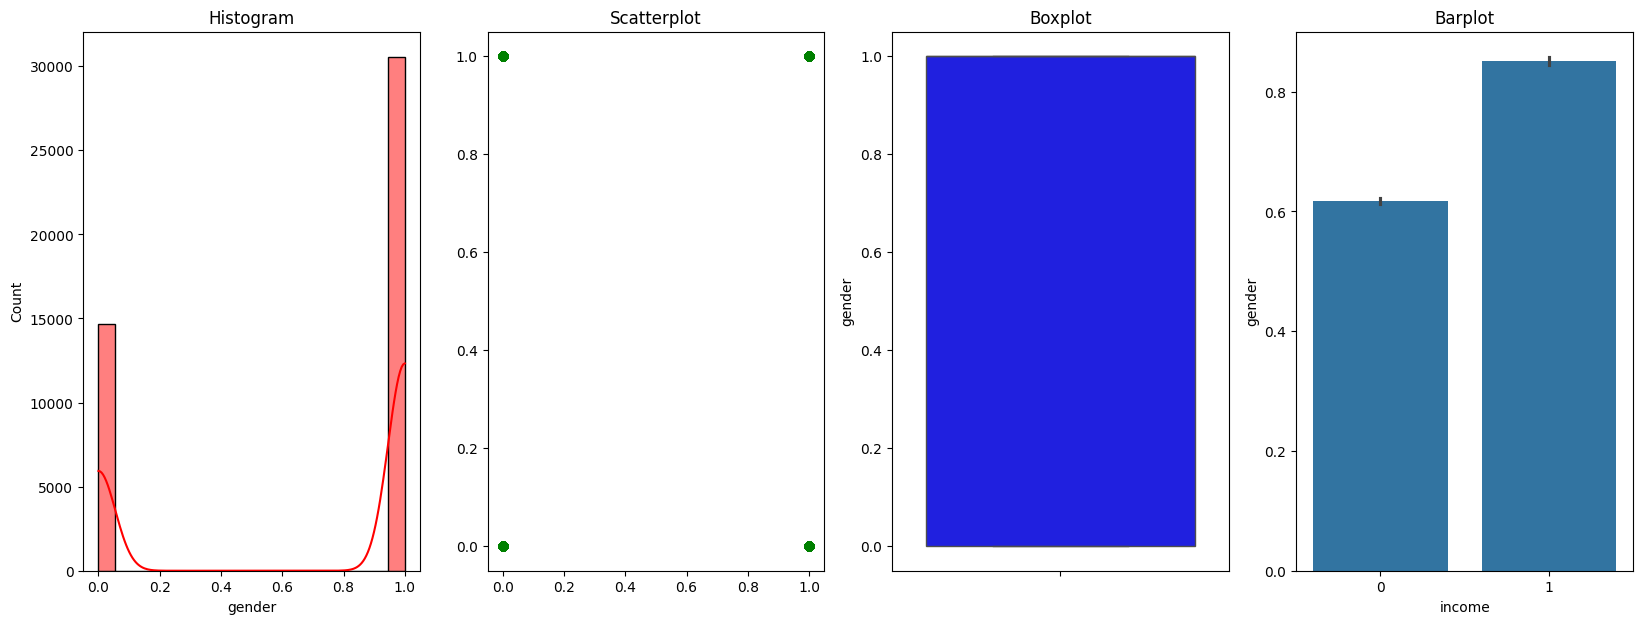

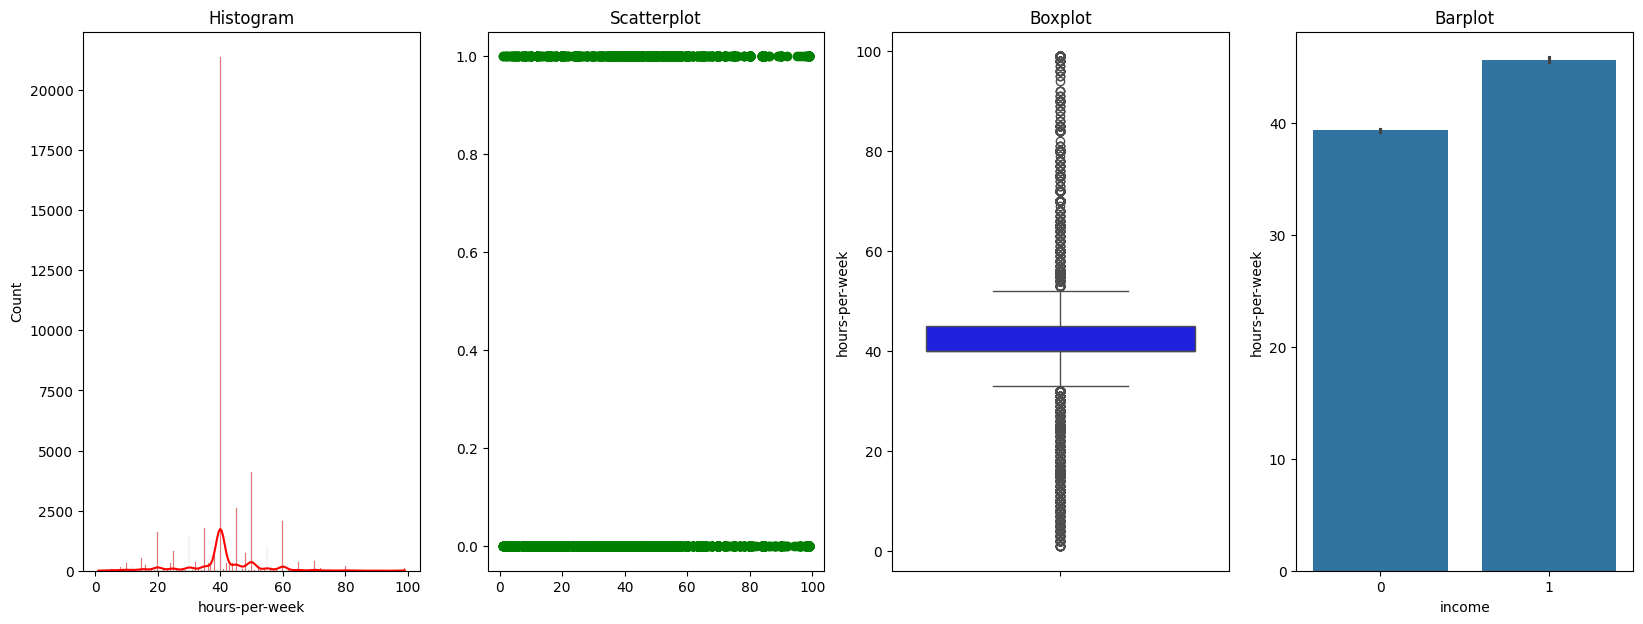

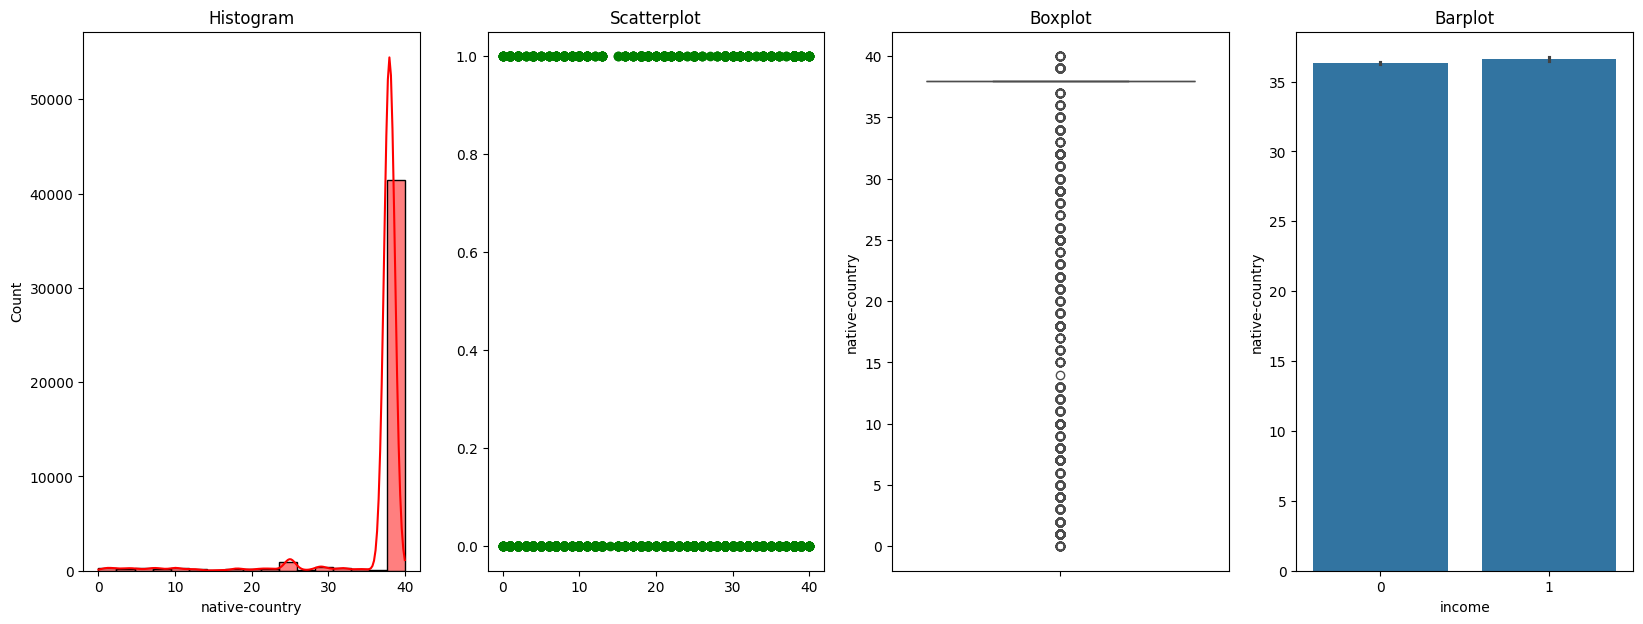

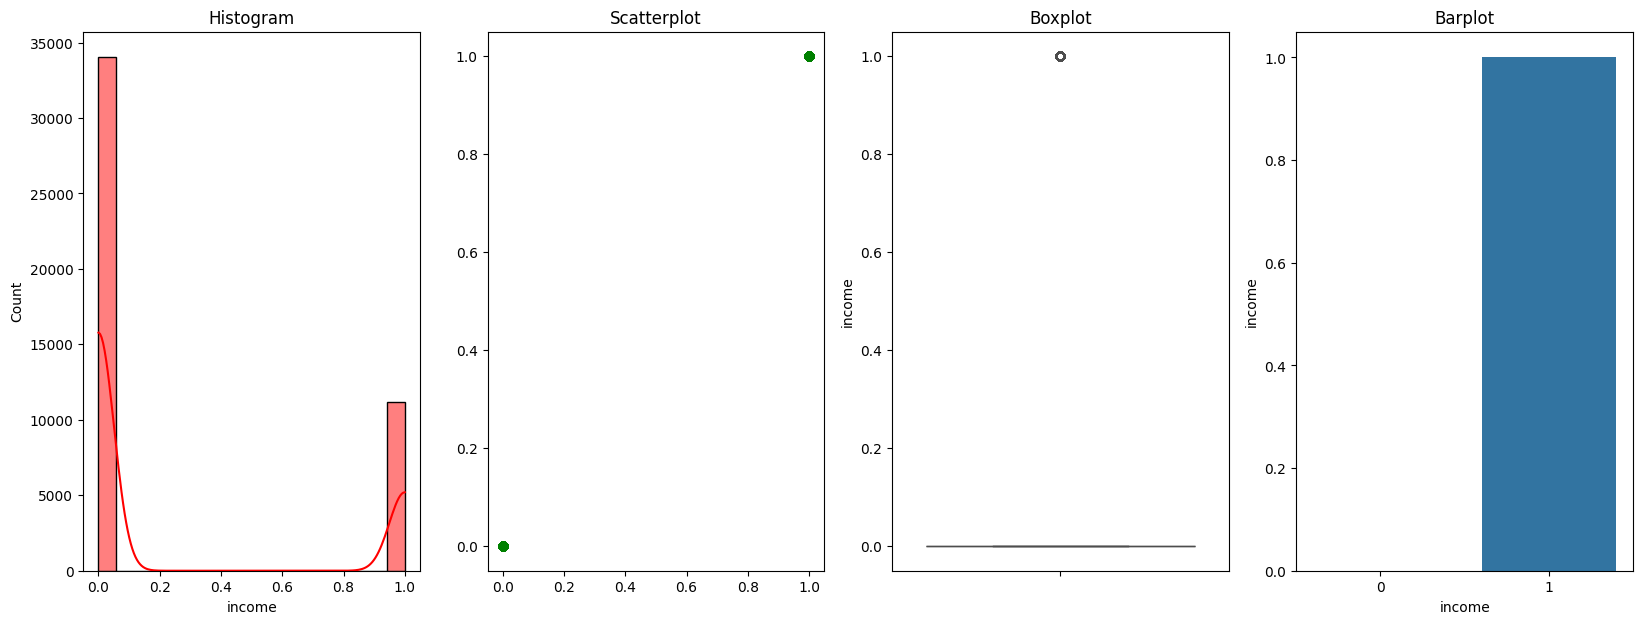

In [185]:
for col in df_1:
    diagnostic_plots(df_1,col,'income')

#Modeling

In [186]:
from sklearn.model_selection import train_test_split
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [188]:
# split Data
X = df_1.drop(columns={"income"},axis=1)
y =df_1["income"].values.reshape(-1,1) #target

In [189]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40699, 11)
y_train shape: (40699, 1)
X_test shape: (4523, 11)
y_test shape: (4523, 1)


In [190]:
# Robust scaling X_train and X_test

from sklearn.preprocessing import RobustScaler
robus_scaler = RobustScaler()
X_train = robus_scaler.fit_transform(X_train)
X_test = robus_scaler.transform(X_test)

In [191]:
from sklearn.preprocessing import MinMaxScaler

st =MinMaxScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

In [192]:
#Find Best K
K = 40
error =[]
accuracy=[]
for i in range(1,K+1):
    knn= KNeighborsClassifier(n_neighbors= i) # n_neighbors = K
    knn.fit(X_train,y_train)
    y_pred =knn.predict(X_test)
    error.append(1-metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))


In [193]:
print(error)
print(accuracy)

[0.2206500110546098, 0.20473137298253374, 0.19677205394649566, 0.19102365686491263, 0.18925491930134863, 0.1824010612425382, 0.18638072076055712, 0.1799690470926376, 0.18019013928808314, 0.18041123148352867, 0.18107450806986514, 0.18306433782887466, 0.18217996904709266, 0.18284324563342913, 0.1861596285651117, 0.1788635861154101, 0.18019013928808314, 0.17930577050630114, 0.18129560026531066, 0.18107450806986514, 0.18505416758788418, 0.18041123148352867, 0.1808534158744196, 0.18019013928808314, 0.18195887685164713, 0.18041123148352867, 0.17952686270174667, 0.17908467831085562, 0.17930577050630114, 0.17842140172451915, 0.18041123148352867, 0.17974795489719209, 0.18107450806986514, 0.17930577050630114, 0.18063232367897408, 0.18063232367897408, 0.17930577050630114, 0.17842140172451915, 0.17930577050630114, 0.17820030952907362]
[0.7793499889453902, 0.7952686270174663, 0.8032279460535043, 0.8089763431350874, 0.8107450806986514, 0.8175989387574618, 0.8136192792394429, 0.8200309529073624, 0.81

Text(0.5, 1.0, 'accuracy vs K')

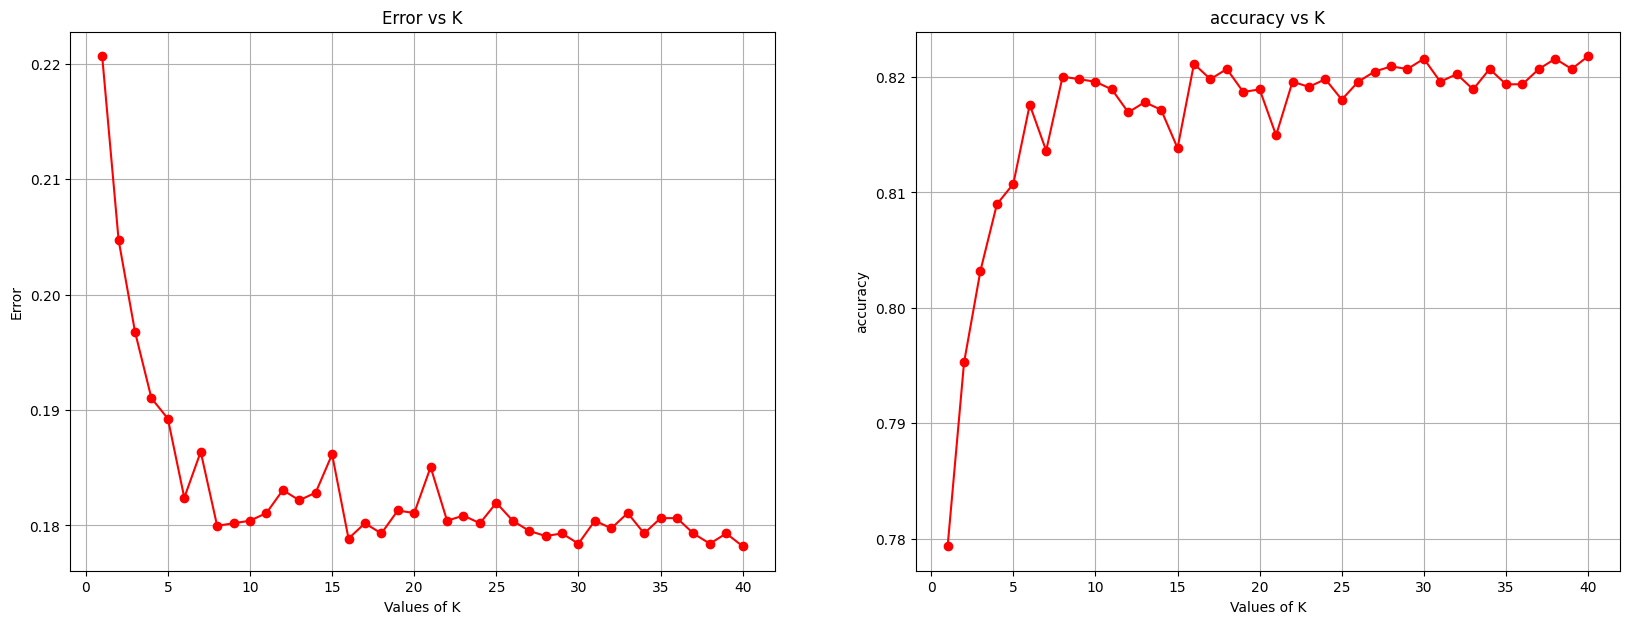

In [194]:

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1,41),error,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.grid()
plt.title('Error vs K')

plt.subplot(1, 2, 2)
plt.plot(range(1,41),accuracy,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('accuracy')
plt.grid()
plt.title('accuracy vs K')

In [195]:
#Find Best K

param_grid = {
    'n_neighbors': [ 7, 9, 11, 13, 15,25, 34 , 40 ,45],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_kn=GridSearchCV(estimator=knn,#model
                     param_grid=param_grid, #range of K
                    scoring='accuracy',# Strategy to evaluate the performance of the cross-validation model on the test set.
                    cv= 5, # Cross-validation generator
                    verbose= 1, #Time to calculate
                    n_jobs= -1 #Help to cpu
                    )
grid_kn.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=40), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [7, 9, 11, 13, 15, 25, 34, 40, 45],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [196]:
grid_kn.best_params_

{'metric': 'manhattan', 'n_neighbors': 45, 'weights': 'uniform'}

In [198]:
best_knn = grid_kn.best_estimator_

# Make predictions on the test set
y_pred_best = best_knn.predict(X_test)

# Evaluate the model
accuracy_best = metrics.accuracy_score(y_test, y_pred_best)
print("Accuracy with best K (45):", accuracy_best)


Accuracy with best K (45): 0.8222418748618173


              precision    recall  f1-score   support

           0     0.8660    0.9036    0.8844      3403
           1     0.6626    0.5750    0.6157      1120

    accuracy                         0.8222      4523
   macro avg     0.7643    0.7393    0.7500      4523
weighted avg     0.8156    0.8222    0.8178      4523



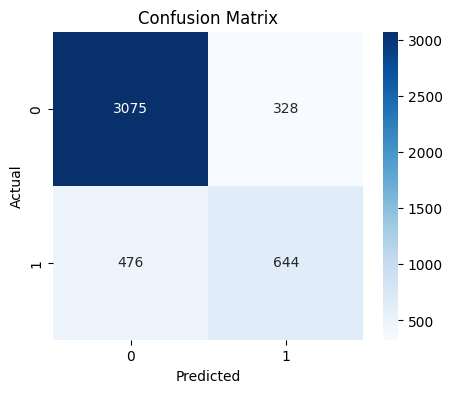

In [199]:
# prompt: classification report , confusion matrix with heat map

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Classification report
print(classification_report(y_test, y_pred_best, digits=4))

# Confusion matrix with heat map
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
